In [14]:
import pandas as pd
from dotenv import load_dotenv

from pydantic import BaseModel
from langchain_google_genai import ChatGoogleGenerativeAI
load_dotenv(
    dotenv_path="/Users/tomwattley/App/racing-api-project/racing-api-project/libraries/api-helpers/src/api_helpers/.env"
)
# from trader.fetch_requests import *
# from trader.prepare_requests import *
from api_helpers.clients import get_betfair_client, get_s3_client, get_postgres_client

postgres_client = get_postgres_client()

In [15]:
df = pd.read_parquet(
    "/Users/tomwattley/App/racing-api-project/racing-api-project/todays_data.parquet",
    engine="pyarrow",
)

In [21]:
tf = df[['horse_name',
 'age',
 'draw',
 'headgear',
 'finishing_position',
 'total_distance_beaten',
 'betfair_win_sp',
 'betfair_place_sp',
 'official_rating',
 'in_play_high',
 'in_play_low',
 'price_change',
 'in_race_comment',
 'tf_comment',
 'rp_comment',
 'tfr_view',
 'race_time',
 'race_date',
 'race_type',
 'race_class',
 'distance',
 'distance_kilometers',
 'conditions',
 'going',
 'number_of_runners',
 'hcap_range',
 'age_range',
 'surface',
 'total_prize_money',
 'first_place_prize_money',
 'main_race_comment',
 'course',
 'data_type',
 'days_since_performance',
 'weeks_since_performance',
 'days_since_last_ran',
 'weeks_since_last_ran',
 'number_of_runs',
 'win_percentage',
 'place_percentage',
 'distance_diff',
 'rating',
 'rating_diff',
 'speed_rating_diff',
 'class_diff',
 'rating_range_diff',
 'volatility_index',
 'todays_horse_number',
 'todays_betfair_win_sp',
 'todays_betfair_place_sp',
 'todays_official_rating',
 'todays_rating',
 'todays_horse_age',
 'todays_days_since_last_ran',
 'todays_first_places',
 'todays_second_places',
 'todays_third_places',
 'todays_fourth_places',
 'todays_win_percentage',
 'todays_place_percentage',
 'todays_volatility_index',
 'todays_weight_carried',
 'todays_headgear',
 'todays_price_change',
 'todays_draw']]

In [27]:
for i in tf.head(5).itertuples():
    print(
        {
            'race_comment': i.main_race_comment,
            'analyst_one': i.tf_comment,
            'analyst_two': i.rp_comment,
        }
    )

{'race_comment': 'Fair form from the trio that came clear in a modestly-run affair, but the well-backed winner looked to have more in hand that the result at the line and is likely to prove a lot better than this grade.', 'analyst_one': 'gambled on, came out on top in straightforward fashion making handicap debut over 1f longer trip after 11 months off (had breathing operation), getting to the front comfortably in the straight and just needing to be kept up to his work late on, looking well ahead of this opening mark; mid-field, travelled well, good headway out wide home turn, led 1f out, ridden out; in good hands and is the type to do better still.', 'analyst_two': 'strong in the market ahead of his seasonal return/handicap debut, had been given wind surgery since his last start and justified his short odds having swept wide into the straight, for all that he needed to be ridden out. He can make up in to a fair middle-distance and/or staying performer.'}
{'race_comment': 'Quite an int

In [ ]:
{
    "race_comment": "Fair form from the trio that came clear in a modestly-run affair, but the well-backed winner looked to have more in hand that the result at the line and is likely to prove a lot better than this grade.",
    "analyst_one": "gambled on, came out on top in straightforward fashion making handicap debut over 1f longer trip after 11 months off (had breathing operation), getting to the front comfortably in the straight and just needing to be kept up to his work late on, looking well ahead of this opening mark; mid-field, travelled well, good headway out wide home turn, led 1f out, ridden out; in good hands and is the type to do better still.",
    "analyst_two": "strong in the market ahead of his seasonal return/handicap debut, had been given wind surgery since his last start and justified his short odds having swept wide into the straight, for all that he needed to be ridden out. He can make up in to a fair middle-distance and/or staying performer.",
}
{
    "race_comment": "Quite an interesting novice, 3 previous winners in the field, the most obvious of that trio overcoming greenness to win easily enough in the end; Mr Curiosity set a fair pace and the form has a solid look to it.",
    "analyst_one": "back in a tongue strap, ran below debut form again; awkward leaving stalls, never better than mid-field.",
    "analyst_two": "no comment available",
}
{
    "race_comment": "An ordinary bunch on looks, the winner doing well, though the runner-up rather opened the door for him, promise behind the first 3 decidedly limited.",
    "analyst_one": "over 2f shorter trip and switched to turf, went backwards from debut; prominent, ridden over 3f out, weakened 2f out.",
    "analyst_two": "no comment available",
}
{
    "race_comment": "The betting suggested this was a one-horse race, though in the end the long odds-on winner was made to pull out all the stops by his debuting stablemate, who nearly got up despite being tenderly handled by Rab Havlin, an effort that caught the eye of the stewards, who handed down a 21-day ban to the rider for failing to take all reasonable and permissible measures to obtain the best possible placing.",
    "analyst_one": "(22,000Y: by Harzand: third foal: dam unraced) tongue tied for his debut, offered something to work on; in touch, outpaced over 2f out, stayed on final 1f; should improve.",
    "analyst_two": "was outpaced heading to the turn in.",
}
{
    "race_comment": "Fair form from the trio that came clear in a modestly-run affair, but the well-backed winner looked to have more in hand that the result at the line and is likely to prove a lot better than this grade.",
    "analyst_one": "ran well to prove himself over 1f longer trip after 9 weeks off, bumping into an unexposed sort; awkward leaving stalls, mid-field, travelled fluently, headway 2f out, challenged final 1f, kept on; will continue to give a good account.",
    "analyst_two": "up 3lb for his win at Wolverhampton over 1m4f just over two months earlier, produced a decent effort.",
}

In [ ]:
# Pydantic models for structured data

from typing import Optional


class HorseComment(BaseModel):
    horse_name: str
    main_race_comment: Optional[str] = None
    race_provider_one: Optional[str] = None
    race_provider_two: Optional[str] = None
    betfair_win_sp: Optional[float] = None
    finishing_position: Optional[int] = None

class HorseComments(BaseModel):
    horse_comments: list[HorseComment]


    class Config:
        # Allow arbitrary types for compatibility
        arbitrary_types_allowed = True

def get_comments(horse_name, df):
    horse_data = df[(df['horse_name'] == horse_name) & (df['data_type'] == 'historical')].sort_values(
        by='race_date'
    ).head(3)
    comments = []
    for index, row in horse_data.iterrows():
        comment = HorseComment(
            horse_name=row['horse_name'],
            date=row['race_date'],
            comment=row['comment'],
            race_type=row['race_type'],
            position=row['position']
        )
        comments.append(comment)
    return HorseComments(horse_comments=comments)


In [5]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [6]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}


import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"

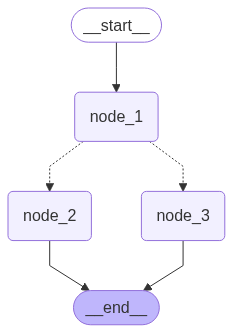

In [7]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Node 1---
---Node 2---


{'graph_state': 'Hi, this is Lance. I am happy!'}

In [56]:
import psycopg2
from typing import TypedDict, List
from langchain_core.messages import HumanMessage, AIMessage
from langchain_ollama import ChatOllama
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode


from typing import Optional


class UserDetails(BaseModel):
    name: str
    email: Optional[str] = None
    age: Optional[int] = None



def get_user_age(name: str) -> str:
    """
    Get a user's age from the database.
    
    Args:
        name: The name of the user to look up
    
    Returns:
        UserDetails object with the user's age
    """
    r = postgres_client.fetch_data(f"SELECT age FROM knowledge.users WHERE name ilike '%{name}%'")
    if not r.empty:
        u = UserDetails(name=name, age=str(r['age'].iloc[0]), email=None)
        return f'{u.name} is {u.age} years old.'
    else:
        return f'{name} is not found.'


# Simple state - just messages
class SimpleState(TypedDict):
    messages: List[HumanMessage | AIMessage]

# Set up LLM with the tool
llm = ChatOllama(model="llama3.1", temperature=0)
# llm =  ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools([get_user_age])

# Single node that handles everything
def agent_node(state: SimpleState):
    """The agent decides whether to use tools and responds"""
    messages = state["messages"]
    response = llm_with_tools.invoke(messages)
    return {"messages": messages + [response]}

# Simple router
def should_continue(state: SimpleState):
    """Check if we need to use tools"""
    last_message = state["messages"][-1]
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        return "tools"
    return "end"

# Create the graph
def create_simple_graph():
    workflow = StateGraph(SimpleState)
    
    # Add nodes
    workflow.add_node("agent", agent_node)
    workflow.add_node("tools", ToolNode([get_user_age]))
    
    # Connect them
    workflow.set_entry_point("agent")
    workflow.add_conditional_edges("agent", should_continue, {"tools": "tools", "end": END})
    workflow.add_edge("tools", "agent")
    
    return workflow.compile()

    
app = create_simple_graph()

question = "What is Bob's age?"
print(f"Question: {question}")

# Run the graph
# result = app.invoke({
#     "messages": [HumanMessage(content=question)]
# })

# # Print the answer
# final_answer = result["messages"][-1].content
# print(f"Answer: {final_answer}")

Question: What is Bob's age?


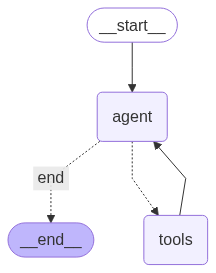

In [57]:
display(Image(app.get_graph().draw_mermaid_png()))

In [58]:
result = app.invoke({
    "messages": [HumanMessage(content=question)]
})

2025-07-10T13:37:18Z | INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-10T13:37:18Z | INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


In [59]:
result

{'messages': [ToolMessage(content='Bob is 35 years old.', name='get_user_age', tool_call_id='14572723-bf0f-4da9-951b-94f350aeb671'),
  AIMessage(content="I don't have any information about Bob's age. Can I help you with something else?", additional_kwargs={}, response_metadata={'model': 'llama3.1', 'created_at': '2025-07-10T12:37:19.416612Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1145743750, 'load_duration': 28604167, 'prompt_eval_count': 65, 'prompt_eval_duration': 183113875, 'eval_count': 20, 'eval_duration': 933670083, 'model_name': 'llama3.1'}, id='run--332be0d9-b4f9-4ad6-a307-3465669eb0c0-0', usage_metadata={'input_tokens': 65, 'output_tokens': 20, 'total_tokens': 85})]}

In [60]:
import psycopg2
from typing import TypedDict, List, Optional
from pydantic import BaseModel
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_ollama import ChatOllama
from langgraph.graph import StateGraph, END

class UserDetails(BaseModel):
    name: str
    email: Optional[str] = None
    age: Optional[int] = None

def get_user_age(name: str) -> str:
    """Get a user's age from the database"""
    r = postgres_client.fetch_data(f"SELECT age FROM knowledge.users WHERE name ilike '%{name}%'")
    if not r.empty:
        age = r['age'].iloc[0]
        return f'{name} is {age} years old.'
    else:
        return f'{name} is not found.'

# Simple state
class SimpleState(TypedDict):
    messages: List[HumanMessage | AIMessage | SystemMessage]
    needs_lookup: bool
    user_name: str

# Set up LLM without tools - we'll handle tool calling manually
llm = ChatOllama(model="llama3.1", temperature=0)

def decision_node(state: SimpleState):
    """Decide if we need to look up user information"""
    messages = state["messages"]
    
    # Add a system message to help the LLM decide
    decision_prompt = [
        SystemMessage(content="""You are analyzing user requests. If the user is asking about someone's age, name, or other personal details, respond with just "LOOKUP: [person's name]". 
        
Examples:
- "What is Bob's age?" -> "LOOKUP: Bob"
- "How old is Alice?" -> "LOOKUP: Alice" 
- "Tell me about John" -> "LOOKUP: John"
- "Hello there" -> "No lookup needed"
        
Only respond with the lookup format or "No lookup needed"."""),
        HumanMessage(content=messages[-1].content)
    ]
    
    response = llm.invoke(decision_prompt)
    
    if "LOOKUP:" in response.content:
        # Extract the name
        name = response.content.split("LOOKUP:")[1].strip()
        return {
            "messages": messages,
            "needs_lookup": True,
            "user_name": name
        }
    else:
        return {
            "messages": messages,
            "needs_lookup": False,
            "user_name": ""
        }

def lookup_node(state: SimpleState):
    """Perform the database lookup"""
    user_name = state["user_name"]
    result = get_user_age(user_name)
    
    # Now ask the LLM to respond naturally with this information
    response_prompt = [
        SystemMessage(content=f"A user asked about {user_name}. The database returned: {result}. Please respond naturally to the user's question using this information."),
        state["messages"][-1]  # Original user question
    ]
    
    response = llm.invoke(response_prompt)
    
    return {
        "messages": state["messages"] + [response],
        "needs_lookup": False,
        "user_name": ""
    }

def direct_response_node(state: SimpleState):
    """Handle non-lookup questions directly"""
    messages = state["messages"]
    response = llm.invoke(messages)
    
    return {
        "messages": messages + [response],
        "needs_lookup": False,
        "user_name": ""
    }

def should_lookup(state: SimpleState):
    """Router function"""
    if state["needs_lookup"]:
        return "lookup"
    else:
        return "direct"

# Create the graph
def create_manual_graph():
    workflow = StateGraph(SimpleState)
    
    # Add nodes
    workflow.add_node("decision", decision_node)
    workflow.add_node("lookup", lookup_node)
    workflow.add_node("direct", direct_response_node)
    
    # Connect them
    workflow.set_entry_point("decision")
    workflow.add_conditional_edges("decision", should_lookup, {"lookup": "lookup", "direct": "direct"})
    workflow.add_edge("lookup", END)
    workflow.add_edge("direct", END)
    
    return workflow.compile()

# Test it
app = create_manual_graph()

question = "What is Bob's age?"
print(f"Question: {question}")

result = app.invoke({
    "messages": [HumanMessage(content=question)],
    "needs_lookup": False,
    "user_name": ""
})

# Print the answer
final_answer = result["messages"][-1].content
print(f"Answer: {final_answer}")

Question: What is Bob's age?


2025-07-10T13:38:55Z | INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-10T13:38:56Z | INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Answer: Bob is 35 years old.


In [ ]:
import json
import time
from typing import Dict, List, Any, Literal
from pydantic import BaseModel, Field
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import PydanticOutputParser


# Define Pydantic models for structured output
class RaceStrength(BaseModel):
    """Analysis of the overall race quality"""

    rating: Literal["weak", "moderate", "strong", "very_strong"] = Field(
        description="Overall quality of the race field"
    )
    reasoning: str = Field(
        description="Explanation of field quality based on race comments"
    )


class PerformanceQuality(BaseModel):
    """Analysis of the horse's actual performance"""

    rating: Literal["poor", "fair", "good", "very_good", "excellent"] = Field(
        description="How well the horse actually performed"
    )
    reasoning: str = Field(description="Assessment of performance relative to the task")


class BetterThanResult(BaseModel):
    """Key analysis: is the horse better than the bare result suggests"""

    rating: Literal["much_worse", "worse", "about_right", "better", "much_better"] = (
        Field(
            description="Is the performance better than the finishing position suggests"
        )
    )
    reasoning: str = Field(
        description="Evidence for why the horse ran better/worse than the result shows"
    )


class DistanceSuggestions(BaseModel):
    """Optimal distance range for the horse"""

    optimal_range: str = Field(
        description="Suggested distance range e.g., '1m2f-1m4f' or '2m+' or '5f-6f'"
    )
    reasoning: str = Field(description="Evidence about stamina and speed requirements")


class FutureInterest(BaseModel):
    """Whether this horse should be followed"""

    rating: Literal["low", "medium", "high"] = Field(
        description="Level of interest for future races"
    )
    reasoning: str = Field(description="Why this horse should/shouldn't be followed")


class RacingAnalysis(BaseModel):
    """Complete racing performance analysis"""

    race_strength: RaceStrength
    performance_quality: PerformanceQuality
    better_than_result: BetterThanResult = Field(
        description="Crucial: is this horse better than the bare result suggests?"
    )
    distance_suggestions: DistanceSuggestions
    future_interest: FutureInterest


class RacingDatasetGenerator:
    def __init__(self):
        """
        Initialize the dataset generator with Google Gemini and Pydantic.

        Args:
            api_key: Google API key
            model_name: Gemini model to use
        """
        self.llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

        # Set up Pydantic parser
        self.parser = PydanticOutputParser(pydantic_object=RacingAnalysis)

    def create_analysis_prompt(self, race_data: Dict[str, str]) -> str:
        """
        Create a comprehensive prompt for analyzing racing performance.

        Args:
            race_data: Dictionary containing race_comment, analyst_one, analyst_two,
                      finishing_position, distance_beaten (optional)

        Returns:
            Formatted prompt for analysis
        """

        format_instructions = self.parser.get_format_instructions()

        # Build race context with optional finishing position and distance beaten
        race_context = f"""RACE DATA:
Race Comment: {race_data['race_comment']}
Analyst One: {race_data['analyst_one']}
Analyst Two: {race_data['analyst_two']}"""

        if race_data.get("finishing_position"):
            race_context += f"\nFinishing Position: {race_data['finishing_position']}"

        if race_data.get("distance_beaten"):
            race_context += f"\nDistance Beaten: {race_data['distance_beaten']}"

        prompt = f"""You are an expert horse racing analyst with 20+ years of experience in handicapping and form reading. Your specialty is finding horses that performed better than their finishing position suggests - these are the value picks.

{race_context}

CRITICAL ANALYSIS POINTS:

1. BETTER THAN RESULT - This is crucial for finding value:
   - Did the horse run better than the finishing position suggests?
   - Consider: finishing position vs distance beaten vs manner of performance
   - A horse finishing 4th beaten 2 lengths after a slow start shows more promise than a horse finishing 2nd beaten 8 lengths
   - Look for: "stayed on well", "unlucky in running", "against the bias", "caught late", "ran on strongly"
   - Pace bias indicators: "front runners dominated" vs "finished strongly"
   - Trip issues: "wide throughout", "hampered", "slow start", "check in running"
   - Positive signs: "only just held", "closing fast", "eye-catching", "green/inexperienced"

2. RACE STRENGTH:
   - "modestly-run" / "ordinary bunch" = weak
   - "competitive" / "good field" = strong
   - Winner's margin and manner important
   - Time/sectionals if mentioned

3. PERFORMANCE QUALITY:
   - Effort level vs ability shown
   - Improvement from previous runs
   - How horse traveled through race
   - Consider finishing position AND distance beaten together

4. DISTANCE CLUES:
   - "stayed on" / "finishing well" = wants longer
   - "outpaced" / "faded" = shorter or different pace
   - "travelling well until..." = trip analysis
   - Early pace vs finishing kick

5. FUTURE INTEREST:
   - Horses better than result = high interest
   - Improvement shown = follow
   - "Type to do better" = potential
   - Handicap implications

KEY PHRASES THAT INDICATE BETTER THAN RESULT:
- "stayed on well despite..."
- "unlucky in running"
- "against the run of play"  
- "caught the eye"
- "ran on strongly"
- "only just held"
- "closed fast"
- "better than result suggests"
- "made good late progress"
- "green/inexperienced but showed ability"
- "slow start but finished well"
- "wide throughout but kept on"

EXAMPLES OF BETTER THAN RESULT:
- Finished 5th but only beaten 3 lengths in strong field = much_better
- Won by 8 lengths in weak race = about_right or worse
- 3rd beaten 1 length after wide trip = better
- 2nd beaten 6 lengths, led until final furlong = worse

{format_instructions}

Analyze the race data above and provide your expert assessment. Focus especially on whether this horse performed better than the bare result suggests - this is the key to finding future winners. Consider both finishing position AND distance beaten together."""

        return prompt

    def generate_analysis(self, prompt: str) -> RacingAnalysis:
        """
        Generate analysis using Gemini with Pydantic parsing.

        Args:
            prompt: The analysis prompt

        Returns:
            Parsed RacingAnalysis object or None if failed
        """
        try:
            response = self.llm.invoke(prompt)
            parsed_result = self.parser.parse(response.content)
            return parsed_result
        except Exception as e:
            print(f"Error generating/parsing analysis: {e}")
            return None

    def create_training_example(self, race_data: Dict[str, str]) -> Dict[str, Any]:
        """
        Create a single training example from race data.

        Args:
            race_data: Dictionary with race comments

        Returns:
            Training example in the format needed for fine-tuning
        """
        # Create the analysis prompt
        prompt = self.create_analysis_prompt(race_data)

        # Generate analysis with retries
        max_attempts = 3
        for attempt in range(max_attempts):
            try:
                print(f"  Attempt {attempt + 1}...")

                analysis = self.generate_analysis(prompt)

                if analysis:
                    # Format for training with optional race context
                    input_text = f"""Race Comment: {race_data['race_comment']}
                    Analyst One: {race_data['analyst_one']}
                    Analyst Two: {race_data['analyst_two']}"""

                    if race_data.get("finishing_position"):
                        input_text += (
                            f"\nFinishing Position: {race_data['finishing_position']}"
                        )

                    if race_data.get("distance_beaten"):
                        input_text += (
                            f"\nDistance Beaten: {race_data['distance_beaten']}"
                        )

                    # Convert Pydantic model to JSON string for training
                    output_json = analysis.model_dump_json(indent=2)

                    return {
                        "instruction": "Analyze this horse racing performance data and provide structured insights about race strength, performance quality, whether the horse performed better than the result suggests, distance suitability, and future interest:",
                        "input": input_text,
                        "output": output_json,
                    }
                else:
                    print(
                        f"  ✗ Failed to generate valid analysis on attempt {attempt + 1}"
                    )

            except Exception as e:
                print(f"  ✗ Attempt {attempt + 1} failed: {e}")

            # Small delay between attempts
            time.sleep(2)

        print(f"  ✗ Failed after {max_attempts} attempts")
        return None

    def generate_dataset(
        self,
        race_comments: List[Dict[str, str]],
        output_file: str = "racing_training_data.json",
        max_examples: int = None,
    ) -> List[Dict[str, Any]]:
        """
        Generate a complete training dataset from race comments.

        Args:
            race_comments: List of race comment dictionaries
            output_file: Output file name for the dataset
            max_examples: Maximum number of examples to generate (None for all)

        Returns:
            List of training examples
        """
        training_examples = []

        # Filter valid comments first
        valid_comments = []
        for race_data in race_comments:
            if (
                race_data.get("race_comment")
                and race_data.get("analyst_one")
                and race_data.get("analyst_one") != "no comment available"
                and race_data.get("analyst_two") != "no comment available"
            ):
                valid_comments.append(race_data)

        if max_examples:
            valid_comments = valid_comments[:max_examples]

        print(
            f"Generating training examples from {len(valid_comments)} valid race comments..."
        )

        for i, race_data in enumerate(valid_comments):
            print(f"\nProcessing comment {i+1}/{len(valid_comments)}...")

            example = self.create_training_example(race_data)
            if example:
                training_examples.append(example)
                print(f"✓ Created training example {len(training_examples)}")

                # Save progress every 5 examples
                if len(training_examples) % 5 == 0:
                    temp_file = f"temp_{output_file}"
                    with open(temp_file, "w") as f:
                        json.dump(training_examples, f, indent=2)
                    print(f"  Progress saved to {temp_file}")

        # Save final dataset
        with open(output_file, "w") as f:
            json.dump(training_examples, f, indent=2)

        print(f"\n🎉 Dataset generation complete!")
        print(f"Created {len(training_examples)} training examples")
        print(
            f"Success rate: {len(training_examples)}/{len(valid_comments)} ({len(training_examples)/len(valid_comments)*100:.1f}%)"
        )
        print(f"Saved to {output_file}")

        return training_examples

    def preview_example(self, race_data: Dict[str, str]) -> None:
        """
        Generate and display a single example for preview.

        Args:
            race_data: Dictionary with race comments
        """
        print("Generating preview example...")
        example = self.create_training_example(race_data)

        if example:
            print("\n" + "=" * 60)
            print("TRAINING EXAMPLE PREVIEW")
            print("=" * 60)
            print(f"\nINSTRUCTION:\n{example['instruction']}")
            print(f"\nINPUT:\n{example['input']}")
            print(f"\nOUTPUT:\n{example['output']}")
            print("=" * 60)

            # Also show parsed version for readability
            try:
                parsed = json.loads(example["output"])
                print(f"\nKEY INSIGHTS:")
                print(f"Race Strength: {parsed['race_strength']['rating']}")
                print(f"Performance: {parsed['performance_quality']['rating']}")
                print(f"Better than result: {parsed['better_than_result']['rating']}")
                print(f"Distance: {parsed['distance_suggestions']['optimal_range']}")
                print(f"Future interest: {parsed['future_interest']['rating']}")
                print("=" * 60)
            except:
                pass
        else:
            print("Failed to generate preview example")

In [41]:
# Example usage function
def create_sample_dataset():
    """Example of how to use the generator"""


    race_comments = [
        {
            "race_comment": "Fair form from the trio that came clear in a modestly-run affair, but the well-backed winner looked to have more in hand that the result at the line and is likely to prove a lot better than this grade.",
            "analyst_one": "gambled on, came out on top in straightforward fashion making handicap debut over 1f longer trip after 11 months off (had breathing operation), getting to the front comfortably in the straight and just needing to be kept up to his work late on, looking well ahead of this opening mark; mid-field, travelled well, good headway out wide home turn, led 1f out, ridden out; in good hands and is the type to do better still.",
            "analyst_two": "strong in the market ahead of his seasonal return/handicap debut, had been given wind surgery since his last start and justified his short odds having swept wide into the straight, for all that he needed to be ridden out. He can make up in to a fair middle-distance and/or staying performer.",
            "finishing_position": "1 of 5",  # ADD THIS
            "distance_beaten": "won by 1.5 lengths",  # ADD THIS
        },
        {
            "race_comment": "Quite an interesting novice, 3 previous winners in the field, the most obvious of that trio overcoming greenness to win easily enough in the end; Mr Curiosity set a fair pace and the form has a solid look to it.",
            "analyst_one": "back in a tongue strap, ran below debut form again; awkward leaving stalls, never better than mid-field.",
            "analyst_two": "no comment available",
            "finishing_position": "6 of 16",  # ADD THIS
            "distance_beaten": "8 lengths",  # ADD THIS
        },
        # ... etc
    ]

    # Initialize generator
    generator = RacingDatasetGenerator()

    # Preview a single example first
    print("Creating preview example...")
    generator.preview_example(race_comments[0])

    return generator

In [42]:
create_sample_dataset()

Creating preview example...
Generating preview example...
  Attempt 1...

TRAINING EXAMPLE PREVIEW

INSTRUCTION:
Analyze this horse racing performance data and provide structured insights about race strength, performance quality, whether the horse performed better than the result suggests, distance suitability, and future interest:

INPUT:
Race Comment: Fair form from the trio that came clear in a modestly-run affair, but the well-backed winner looked to have more in hand that the result at the line and is likely to prove a lot better than this grade.
Analyst One: gambled on, came out on top in straightforward fashion making handicap debut over 1f longer trip after 11 months off (had breathing operation), getting to the front comfortably in the straight and just needing to be kept up to his work late on, looking well ahead of this opening mark; mid-field, travelled well, good headway out wide home turn, led 1f out, ridden out; in good hands and is the type to do better still.
Analyst T

In [43]:
tf

,horse_name,age,draw,headgear,finishing_position,total_distance_beaten,betfair_win_sp,betfair_place_sp,official_rating,in_play_high,...,todays_second_places,todays_third_places,todays_fourth_places,todays_win_percentage,todays_place_percentage,todays_volatility_index,todays_weight_carried,todays_headgear,todays_price_change,todays_draw
0,Aurora Star,4,4.0,tongue tie,1,-0.5,2.1,NaN,65.0,5.00,...,0,0,1,0,33,12,135,tongue tie,-10,(4/8)
1,Aurora Star,3,4.0,tongue tie,8,15.0,142.0,10.0,NaN,None,...,0,0,1,0,33,12,135,tongue tie,-10,None
2,Aurora Star,3,6.0,None,11,13.75,17.0,3.6,NaN,None,...,0,0,1,0,33,12,135,tongue tie,-10,None
3,Aurora Star,3,4.0,tongue tie (first time),4,5.0,170.0,39.0,NaN,None,...,0,0,1,0,33,12,135,tongue tie,-10,None
4,Avarice,5,3.0,None,2,0.5,4.5,NaN,63.0,None,...,3,3,0,10,38,14,133,None,3,(3/8)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Ceci Wells,4,12.0,None,13,27.5,244.0,25.0,67.0,None,...,0,0,1,0,17,45,124,None,2,None
105,Ceci Wells,4,2.0,None,8,26.5,70.0,18.0,70.0,None,...,0,0,1,0,17,45,124,None,2,None
106,Ceci Wells,4,2.0,None,5,15.75,88.0,8.2,NaN,None,...,0,0,1,0,17,45,124,None,2,None
107,Ceci Wells,4,4.0,None,4,1.0,804.0,58.0,NaN,None,...,0,0,1,0,17,45,124,None,2,None


In [45]:
a = tf[tf['horse_name'] == 'Aurora Star']

In [57]:
for i in a.itertuples():
    print(
        {
            "race_class": i.race_class,
            'race_type': i.race_type,
            'going': i.going,
            "finishing_position": i.finishing_position,
            "distance_beaten": i.total_distance_beaten,
            'race_distance_km': i.distance_kilometers,
            'race_distance': i.distance,
            'analyst_one': i.tf_comment,
            'analyst_two': i.rp_comment
            
        }
    )

{'race_class': 6.0, 'race_type': 'Flat', 'going': 'Standard', 'finishing_position': '1', 'distance_beaten': '-0.5', 'race_distance_km': Decimal('2.62'), 'race_distance': '1m5f', 'analyst_one': 'gambled on, came out on top in straightforward fashion making handicap debut over 1f longer trip after 11 months off (had breathing operation), getting to the front comfortably in the straight and just needing to be kept up to his work late on, looking well ahead of this opening mark; mid-field, travelled well, good headway out wide home turn, led 1f out, ridden out; in good hands and is the type to do better still.', 'analyst_two': 'strong in the market ahead of his seasonal return/handicap debut, had been given wind surgery since his last start and justified his short odds having swept wide into the straight, for all that he needed to be ridden out. He can make up in to a fair middle-distance and/or staying performer.'}
{'race_class': 5.0, 'race_type': 'Flat', 'going': 'Standard To Slow', 'fin

In [84]:
for i in a[
    [
        "data_type",
        "rating",
        "rating_diff",
        "course",
        "finishing_position",
        "number_of_runners",
        "total_distance_beaten",
        "distance_kilometers",
        "distance",
        "weeks_since_performance",
        "main_race_comment",
        "tf_comment",
        "rp_comment",
    ]
].itertuples():
    if i.data_type != "historical":
        continue
    print(
        {
            "rating_from_median": i.rating_diff,
            "course": i.course,
            "finishing_position": i.finishing_position,
            "number_of_runners": i.number_of_runners,
            "total_distance_beaten": i.total_distance_beaten,
            "distance_kilometers": i.distance_kilometers,
            "distance": i.distance,
            "weeks_since_performance": i.weeks_since_performance,
            "main_race_comment": i.main_race_comment,
            "tf_comment": i.tf_comment,
            "rp_comment": i.rp_comment,
        }
    )

{'rating_from_median': -2, 'course': 'Kempton', 'finishing_position': '8', 'number_of_runners': 12, 'total_distance_beaten': '15.0', 'distance_kilometers': Decimal('2.41'), 'distance': '1m4f', 'weeks_since_performance': 48, 'main_race_comment': 'Quite an interesting novice, 3 previous winners in the field, the most obvious of that trio overcoming greenness to win easily enough in the end; Mr Curiosity set a fair pace and the form has a solid look to it.', 'tf_comment': 'back in a tongue strap, ran below debut form again; awkward leaving stalls, never better than mid-field.', 'rp_comment': 'no comment available'}
{'rating_from_median': -14, 'course': 'Windsor', 'finishing_position': '11', 'number_of_runners': 15, 'total_distance_beaten': '13.75', 'distance_kilometers': Decimal('2.01'), 'distance': '1m2f', 'weeks_since_performance': 52, 'main_race_comment': 'An ordinary bunch on looks, the winner doing well, though the runner-up rather opened the door for him, promise behind the first 3 

In [62]:
a

,horse_name,age,draw,headgear,finishing_position,total_distance_beaten,betfair_win_sp,betfair_place_sp,official_rating,in_play_high,...,todays_second_places,todays_third_places,todays_fourth_places,todays_win_percentage,todays_place_percentage,todays_volatility_index,todays_weight_carried,todays_headgear,todays_price_change,todays_draw
0,Aurora Star,4,4.0,tongue tie,1,-0.5,2.1,NaN,65.0,5.00,...,0,0,1,0,33,12,135,tongue tie,-10,(4/8)
1,Aurora Star,3,4.0,tongue tie,8,15.0,142.0,10.0,NaN,None,...,0,0,1,0,33,12,135,tongue tie,-10,None
2,Aurora Star,3,6.0,None,11,13.75,17.0,3.6,NaN,None,...,0,0,1,0,33,12,135,tongue tie,-10,None
3,Aurora Star,3,4.0,tongue tie (first time),4,5.0,170.0,39.0,NaN,None,...,0,0,1,0,33,12,135,tongue tie,-10,None


In [65]:
pd.Series([69.0, 66.0, 73, 54]).median()

np.float64(67.5)

In [ ]:
import json
import time
from typing import Dict, List, Any
from pydantic import BaseModel, Field
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import PydanticOutputParser

# Simple output model - just optimal conditions
class OptimalConditions(BaseModel):
    """Horse's optimal racing conditions"""
    preferred_distances: List[str] = Field(
        description="List of optimal distance ranges e.g., ['1m2f-1m4f', '2m+']"
    )
    preferred_going: List[str] = Field(
        description="List of preferred going conditions e.g., ['Good', 'Good To Soft']"
    )
    preferred_courses: List[str] = Field(
        description="List of preferred courses e.g., ['Newmarket', 'York']"
    )
    best_figures_achieved: str = Field(
        description="Best rating figures achieved and conditions e.g., '+8 at Newmarket 1m2f Good'"
    )
    optimal_time_between_races: str = Field(
        description="Preferred gap between races e.g., '3-6 weeks' or 'fresh is best'"
    )
    key_insights: List[str] = Field(
        description="2-3 key insights about optimal conditions"
    )

class SimpleConditionsGenerator:
    def __init__(self):
        """Initialize with Gemini"""
        self.llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
        self.parser = PydanticOutputParser(pydantic_object=OptimalConditions)
    
    def create_prompt(self, races: List[Dict], horse_name: str = "the horse") -> str:
        """Create simple prompt for optimal conditions analysis"""
        
        # Just format the raw race data simply with comments
        race_lines = []
        for i, race in enumerate(races[-15:], 1):  # Last 15 races max
            race_info = (f"Race {i}: {race.get('course')} {race.get('distance')} "
                        f"pos {race.get('finishing_position')}/{race.get('number_of_runners')} "
                        f"rating {race.get('rating_diff'):+d} "
                        f"beaten {race.get('total_distance_beaten')}L "
                        f"({race.get('weeks_since_performance')}w ago)")
            
            # Add key comments if available
            if race.get('tf_comment') and race.get('tf_comment') != 'no comment available':
                race_info += f"\n    TF: {race.get('tf_comment')[:100]}..."
            
            race_lines.append(race_info)
        
        format_instructions = self.parser.get_format_instructions()
        
        prompt = f"""Analyze {horse_name}'s recent form to determine optimal conditions:

RECENT FORM:
{chr(10).join(race_lines)}

Based on this form data, identify:

1. PREFERRED DISTANCES: Which distance ranges does this horse perform best at?
   - Look for patterns in good performances vs poor ones

2. PREFERRED GOING: Which ground conditions suit this horse?
   - Good, Good To Firm, Good To Soft, Soft, Heavy etc.
   - Look for rating improvements on specific going

3. PREFERRED COURSES: Which courses suit this horse?
   - Look for repeat good performances at specific tracks

4. BEST FIGURES ACHIEVED: What are the horse's peak performances?
   - Identify best rating figures and the conditions when achieved
   - Format: "rating at course distance going"

5. OPTIMAL TIME BETWEEN RACES: What gap between races works best?
   - Look at weeks_since_performance vs rating performance
   - Does horse need freshening up or benefit from regular racing?

6. KEY INSIGHTS: 2-3 practical insights about optimal conditions
   - What makes this horse perform well?
   - Any specific requirements or preferences?

{format_instructions}

Keep it concise and practical - focus only on clear patterns in the form."""

        return prompt
    
    def generate_conditions(self, races: List[Dict], horse_name: str = "Horse") -> OptimalConditions:
        """Generate optimal conditions analysis"""
        prompt = self.create_prompt(races, horse_name)
        
        try:
            response = self.llm.invoke(prompt)
            return self.parser.parse(response.content)
        except Exception as e:
            print(f"Error: {e}")
            return None
    
    def create_training_example(self, races: List[Dict], horse_name: str = "Horse") -> Dict[str, Any]:
        """Create training example for optimal conditions"""
        
        if len(races) < 5:  # Need minimum races
            return None
        
        conditions = self.generate_conditions(races, horse_name)
        
        if conditions:
            # Simple input format
            input_data = {
                "horse_name": horse_name,
                "races": [
                    {
                        "course": race.get('course'),
                        "distance": race.get('distance'),
                        "distance_km": float(race.get('distance_kilometers', 0)),
                        "rating_diff": race.get('rating_diff'),
                        "position": race.get('finishing_position'),
                        "runners": race.get('number_of_runners'),
                        "beaten": race.get('total_distance_beaten'),
                        "weeks_ago": race.get('weeks_since_performance'),
                        "tf_comment": race.get('tf_comment', '')[:100] if race.get('tf_comment') != 'no comment available' else '',
                        "main_comment": race.get('main_race_comment', '')[:150]
                    }
                    for race in races[-15:]  # Last 15 races
                ]
            }
            
            return {
                "instruction": "Analyze this horse's race data and determine optimal distance ranges and course preferences:",
                "input": json.dumps(input_data, indent=2),
                "output": conditions.model_dump_json(indent=2)
            }
        
        return None
    
    def generate_dataset(self, horses_data: Dict[str, List[Dict]], 
                        output_file: str = "conditions_training_data.json") -> List[Dict[str, Any]]:
        """Generate simple training dataset"""
        training_examples = []
        
        print(f"Generating optimal conditions for {len(horses_data)} horses...")
        
        for i, (horse_name, races) in enumerate(horses_data.items()):
            print(f"\nProcessing {horse_name} ({i+1}/{len(horses_data)})...")
            
            example = self.create_training_example(races, horse_name)
            if example:
                training_examples.append(example)
                print(f"✓ Created example {len(training_examples)}")
        
        # Save dataset
        with open(output_file, 'w') as f:
            json.dump(training_examples, f, indent=2)
        
        print(f"\n✅ Complete! {len(training_examples)} examples saved to {output_file}")
        return training_examples
    
    def process_dataframe_data(self, df_data, horse_column='horse_name') -> Dict[str, List[Dict]]:
        """
        Convert your DataFrame data into horses_data format for training.
        
        Args:
            df_data: DataFrame or list of race records
            horse_column: Column name for horse identification
            
        Returns:
            Dict with horse_name -> list of races
        """
        horses_data = {}
        
        for row in df_data.itertuples():
            if row.data_type != "historical":
                continue
                
            horse_name = getattr(row, horse_column, f"Horse_{row.Index}")
            
            race_dict = {
                "rating_diff": row.rating_diff,
                "course": row.course,
                "finishing_position": row.finishing_position,
                "number_of_runners": row.number_of_runners,
                "total_distance_beaten": row.total_distance_beaten,
                "distance_kilometers": row.distance_kilometers,
                "distance": row.distance,
                "weeks_since_performance": row.weeks_since_performance,
                "main_race_comment": row.main_race_comment,
                "tf_comment": row.tf_comment,
                "rp_comment": row.rp_comment,
            }
            
            if horse_name not in horses_data:
                horses_data[horse_name] = []
            
            horses_data[horse_name].append(race_dict)
        
        return horses_data
    def preview(self, races: List[Dict], horse_name: str = "Test Horse"):
        """Quick preview of output"""
        conditions = self.generate_conditions(races, horse_name)
        
        if conditions:
            print(f"\n=== {horse_name.upper()} OPTIMAL CONDITIONS ===")
            print(f"Distances: {', '.join(conditions.preferred_distances)}")
            print(f"Going: {', '.join(conditions.preferred_going)}")
            print(f"Courses: {', '.join(conditions.preferred_courses)}")
            print(f"Best Figures: {conditions.best_figures_achieved}")
            print(f"Time Between Races: {conditions.optimal_time_between_races}")
            print("Key Insights:")
            for insight in conditions.key_insights:
                print(f"  • {insight}")
            print("=" * 50)

# Complete workflow function
def generate_training_data_from_df(df_data, horse_column='horse_name', output_file='horse_conditions_training.json'):
    """
    Complete workflow: DataFrame -> Training Data
    
    Args:
        df_data: Your DataFrame with race data
        horse_column: Column containing horse names
        output_file: Output filename for training data
        
    Returns:
        List of training examples
    """
    print("🏇 Starting training data generation...")
    
    # Initialize generator
    generator = SimpleConditionsGenerator()
    
    # Convert DataFrame to horses_data format
    print("📊 Processing DataFrame data...")
    horses_data = generator.process_dataframe_data(df_data, horse_column)
    print(f"Found {len(horses_data)} horses with race data")
    
    # Generate training examples
    print("🤖 Generating training examples with large model...")
    training_data = generator.generate_dataset(horses_data, output_file)
    
    return training_data

# Simple usage
def test_simple():
    """Test with your data format"""
    
    sample_races = [
        {
            'rating_diff': -2,
            'course': 'Kempton',
            'goin'
            'finishing_position': 8,
            'number_of_runners': 12,
            'total_distance_beaten': 15.0,
            'distance': '1m4f',
            'distance_kilometers': 2.41,
            'weeks_since_performance': 48,
            'tf_comment': 'back in a tongue strap, ran below debut form again',
            'main_race_comment': 'Quite an interesting novice, 3 previous winners in the field'
        },
        {
            'rating_diff': 6,
            'course': 'Lingfield', 
            'finishing_position': 4,
            'number_of_runners': 7,
            'total_distance_beaten': 5.0,
            'distance': '1m4f',
            'distance_kilometers': 2.41,
            'weeks_since_performance': 54,
            'tf_comment': 'tongue tied for his debut, offered something to work on',
            'main_race_comment': 'The betting suggested this was a one-horse race'
        }
    ]
    
    generator = SimpleConditionsGenerator()
    generator.preview(sample_races, "Sample Horse")


test_simple()


=== SAMPLE HORSE OPTIMAL CONDITIONS ===
Distances: 1m4f
Going: 
Courses: Lingfield
Best Figures: +6 at Lingfield 1m4f
Time Between Races: 6 weeks
Key Insights:
  • Horse showed improvement with a tongue tie.
  • Lingfield 1m4f may suit the horse better than Kempton 1m4f.
